In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multinomial
import seaborn as sns
import pymc3 as pm
from tqdm import tqdm_notebook as tqdm
import theano.tensor as tt
import os
import sklearn.metrics

In [2]:
from psych_metric.datasets.volcano.dataset import SimulatedVolcanoMultinomial
from psych_metric.metrics.volcano.metric import VolcanoMetricMultinomialEM

In [4]:
ROOT = os.environ['ROOT']
np.set_printoptions(suppress=True)
# sns.set_style('darkgrid')

# Two Class Case

## Split Train and Test

In [158]:
posterior = np.array([
    [0.8, 0.1, 0.1],
    [0.2, 0.1, 0.7],
])
prior = np.array([0.3, 0.7])

ds_train = SimulatedVolcanoMultinomial(
    posterior=posterior,
    prior=prior,
    n_annos=[15,30],
    N=10000
)

ds_test = SimulatedVolcanoMultinomial(
    posterior=posterior,
    prior=prior,
    n_annos=[15,30],
    N=1000
)

## Calculate Classes from Train Set

Divergence: 0.41639696750404104
Divergence: 0.1637636132335422
Divergence: 0.0940169191206216
Divergence: 0.06076193377955161
Divergence: 0.13217333029137726
Divergence: 0.21878197137012081
Divergence: 0.10761039117671893
Divergence: 0.012149413262278905
Divergence: 0.0


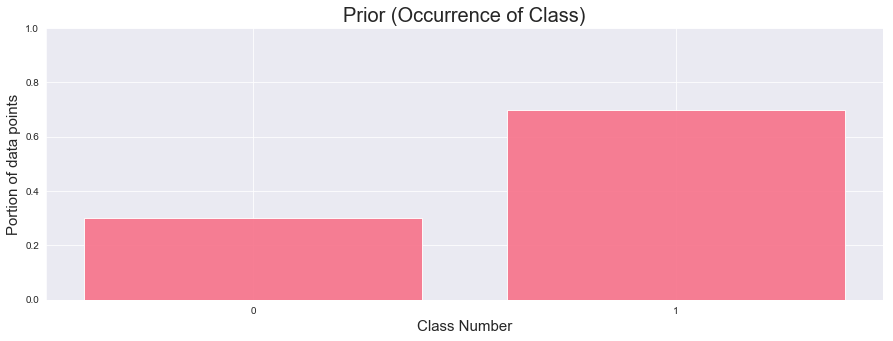

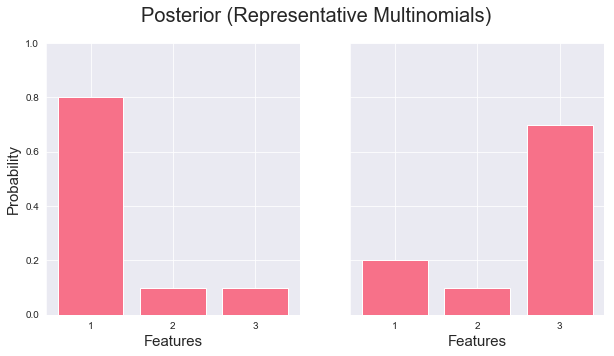

In [160]:
Metric = VolcanoMetricMultinomialEM(n_classes=2)
Metric.train(ds.X)
Metric.plot_prior()
Metric.plot_posterior()

## Get True Labels of Train and Test Set

In [161]:
Y_train = Metric.predict(ds_train.X)
Y_test = Metric.predict(ds_test.X)

## Train Some Models

In [162]:
prior = np.array([0.35, 0.65])
ds_hat1 = SimulatedVolcanoMultinomial(
    posterior=posterior,
    prior=prior,
    n_annos=[15,30],
    N=1000
)

prior = np.array([0.6, 0.4])
ds_hat2 = SimulatedVolcanoMultinomial(
    posterior=posterior,
    prior=prior,
    n_annos=[15,30],
    N=1000
)


In [163]:
ys = [Y_test.copy() for _ in Y_hats.keys()]
yhats = [
    Metric.predict_proba(ds_hat1.X),
    Metric.predict_proba(ds_hat2.X),
]
labels = ['good', 'bad']

# Evaluate with ROC Curves

In [164]:
roc = MCROC(
    ys=ys, yhats=yhats, labels=labels, n_classes=2
)

In [165]:
print(roc.get_overall_accuracies())
print(roc.get_perclass_accuracies())

[0.948, 0.699]
[[0.993, 0.928], [0.993, 0.572]]


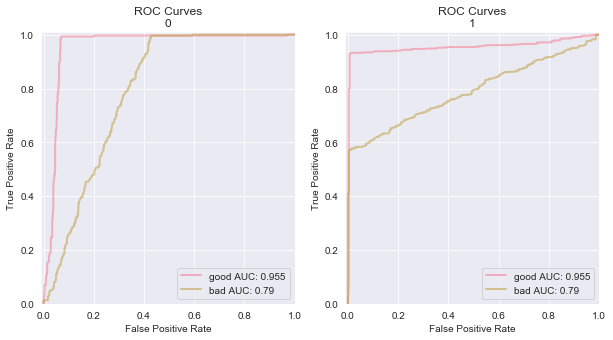

In [166]:
roc.get_fpr_tpr_auc(average=None)
roc.plot_roc_one_vs_all(h=5)

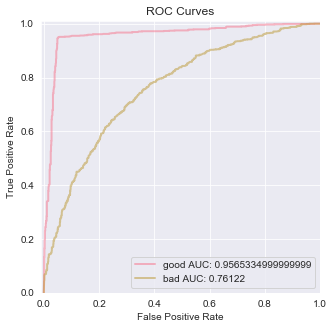

In [167]:
fprs, tprs, aucs = roc.get_fpr_tpr_auc(average='micro')
roc.plot_roc(fprs, tprs, aucs, w=5, h=5)